<a href="https://colab.research.google.com/github/jelenastevic/Kaggle_datasets/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages and importing libraries

In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

 83% 5.00M/6.03M [00:00<00:00, 32.1MB/s]
100% 6.03M/6.03M [00:00<00:00, 37.9MB/s]


In [7]:
!unzip diabetes-health-indicators-dataset.zip

Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic data overview and Data cleaning

In [9]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [10]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
#Checking the shape of dataframe
df.shape

(253680, 22)

In [12]:
#Columns in dataframe
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [13]:
#Checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

From this we can conclude that there are no missing values and that data is in numeric format.

In [14]:
#Checking basic statistical info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [15]:
#Checking duplicated rows
df.duplicated().value_counts()

False    229474
True      24206
dtype: int64

We can se that there are 24206 duplicated rows. Duplicated rows will be removed from dataset.

In [16]:
#Removing duplicated rows
df = df.drop_duplicates()

#Checking duplicated rows again
df.duplicated().value_counts()

False    229474
dtype: int64

There are no more duplicated rows.

# Exploritory Data Analysis

## Basic analysis

In [17]:
#Number of unigue values
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [18]:
#Unique values for every variable
for col in df.columns:
  print(f"{col}: {np.sort(df[col].unique())}")

Diabetes_binary: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [0. 1.]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 88. 89. 90. 91. 92. 95. 96. 98.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [0. 1.]
NoDocbcCost: [0. 1.]
GenHlth: [1. 2. 3. 4. 5.]
MentHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13

Based on number of unique values and informations about dataset we can separate categorical and numerical values for furder exploration.


*   Numerical variables: BMI, MntHlth, PhysHlth
*   Categorical bins: 'Age', 'GenHlth', 'Education', 'Income'
*   Categorical binary: 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'





In [19]:
#Create a list to store binary variables and non binary
binary = []
non_binary = []

#Looping trough columns in DataFrame
for col in df.columns:
  if df[col].nunique() == 2:
    binary.append(col)
  else:
    non_binary.append(col)

#Creating separate DataFrames for better exploration of variables:
df_binary = df[binary].drop('Diabetes_binary', axis = 1)
df_non_binary = df[non_binary]

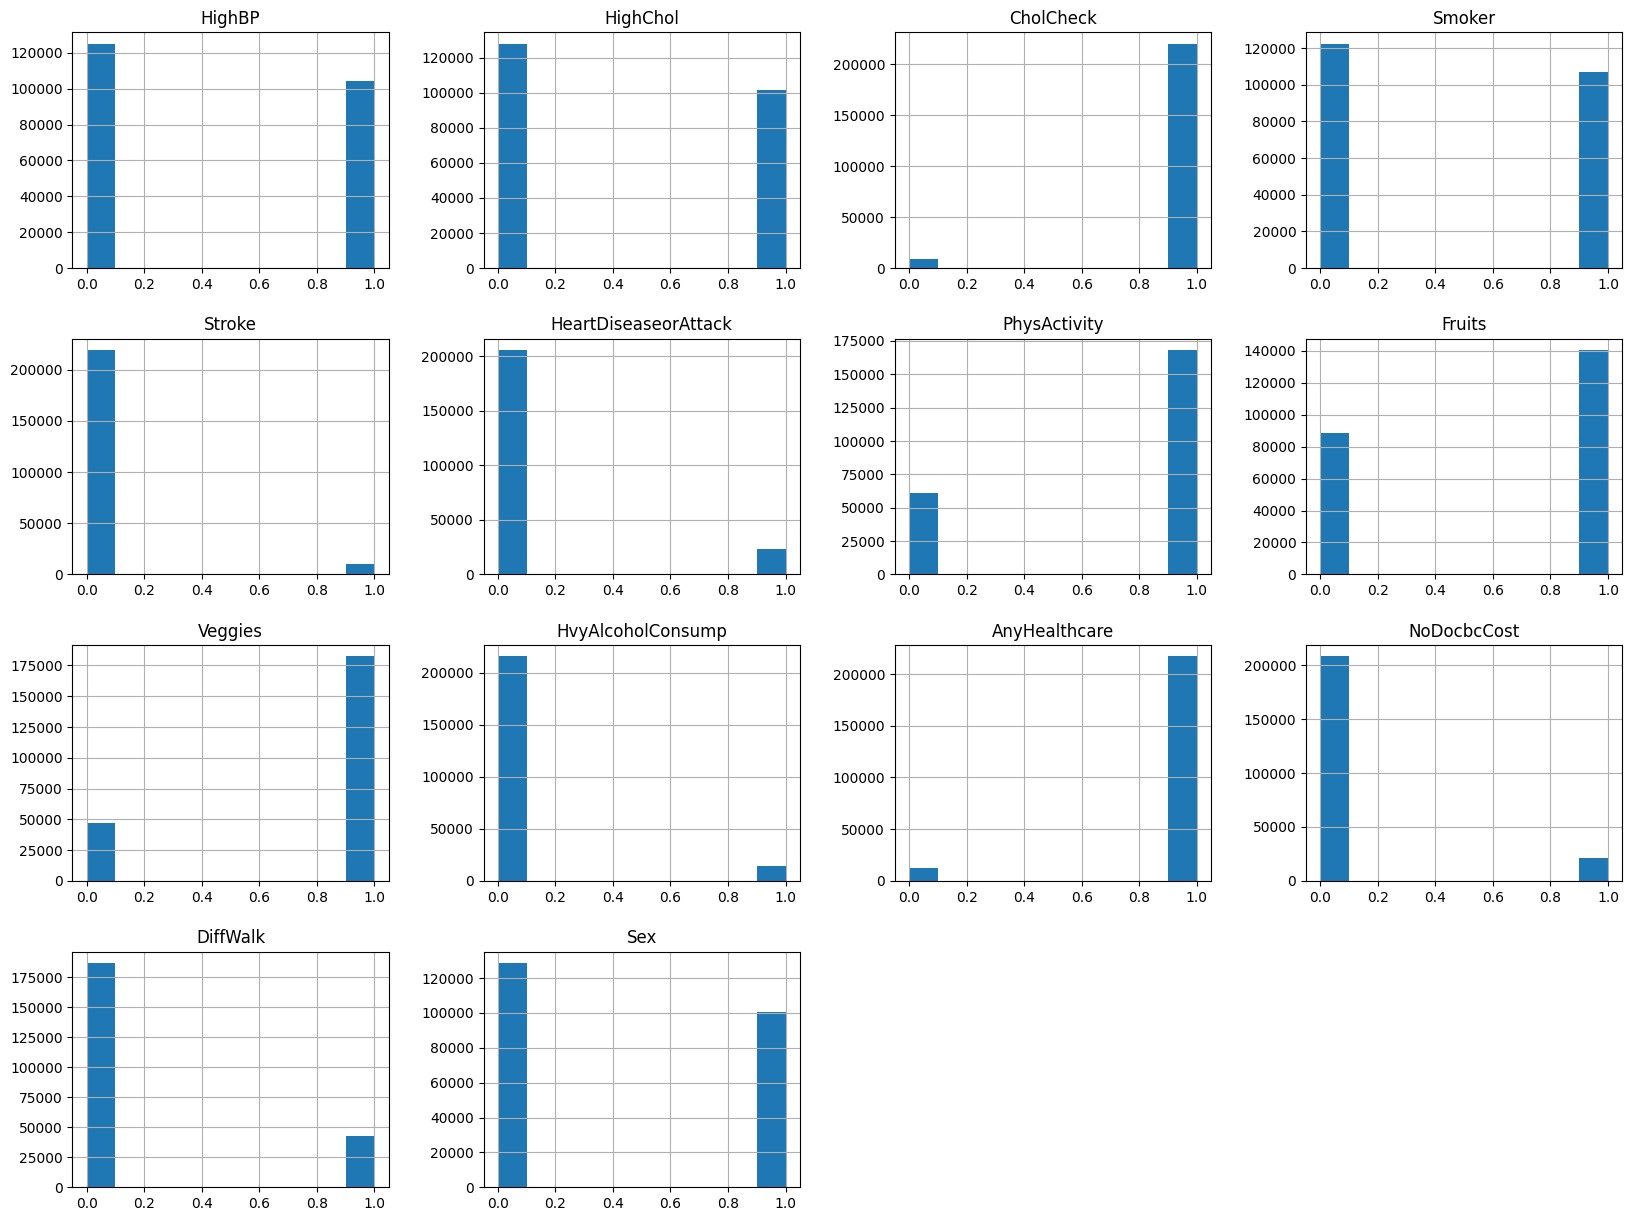

In [20]:
#Checking the distribution of binary variables
df_binary.hist(figsize=(20,15));

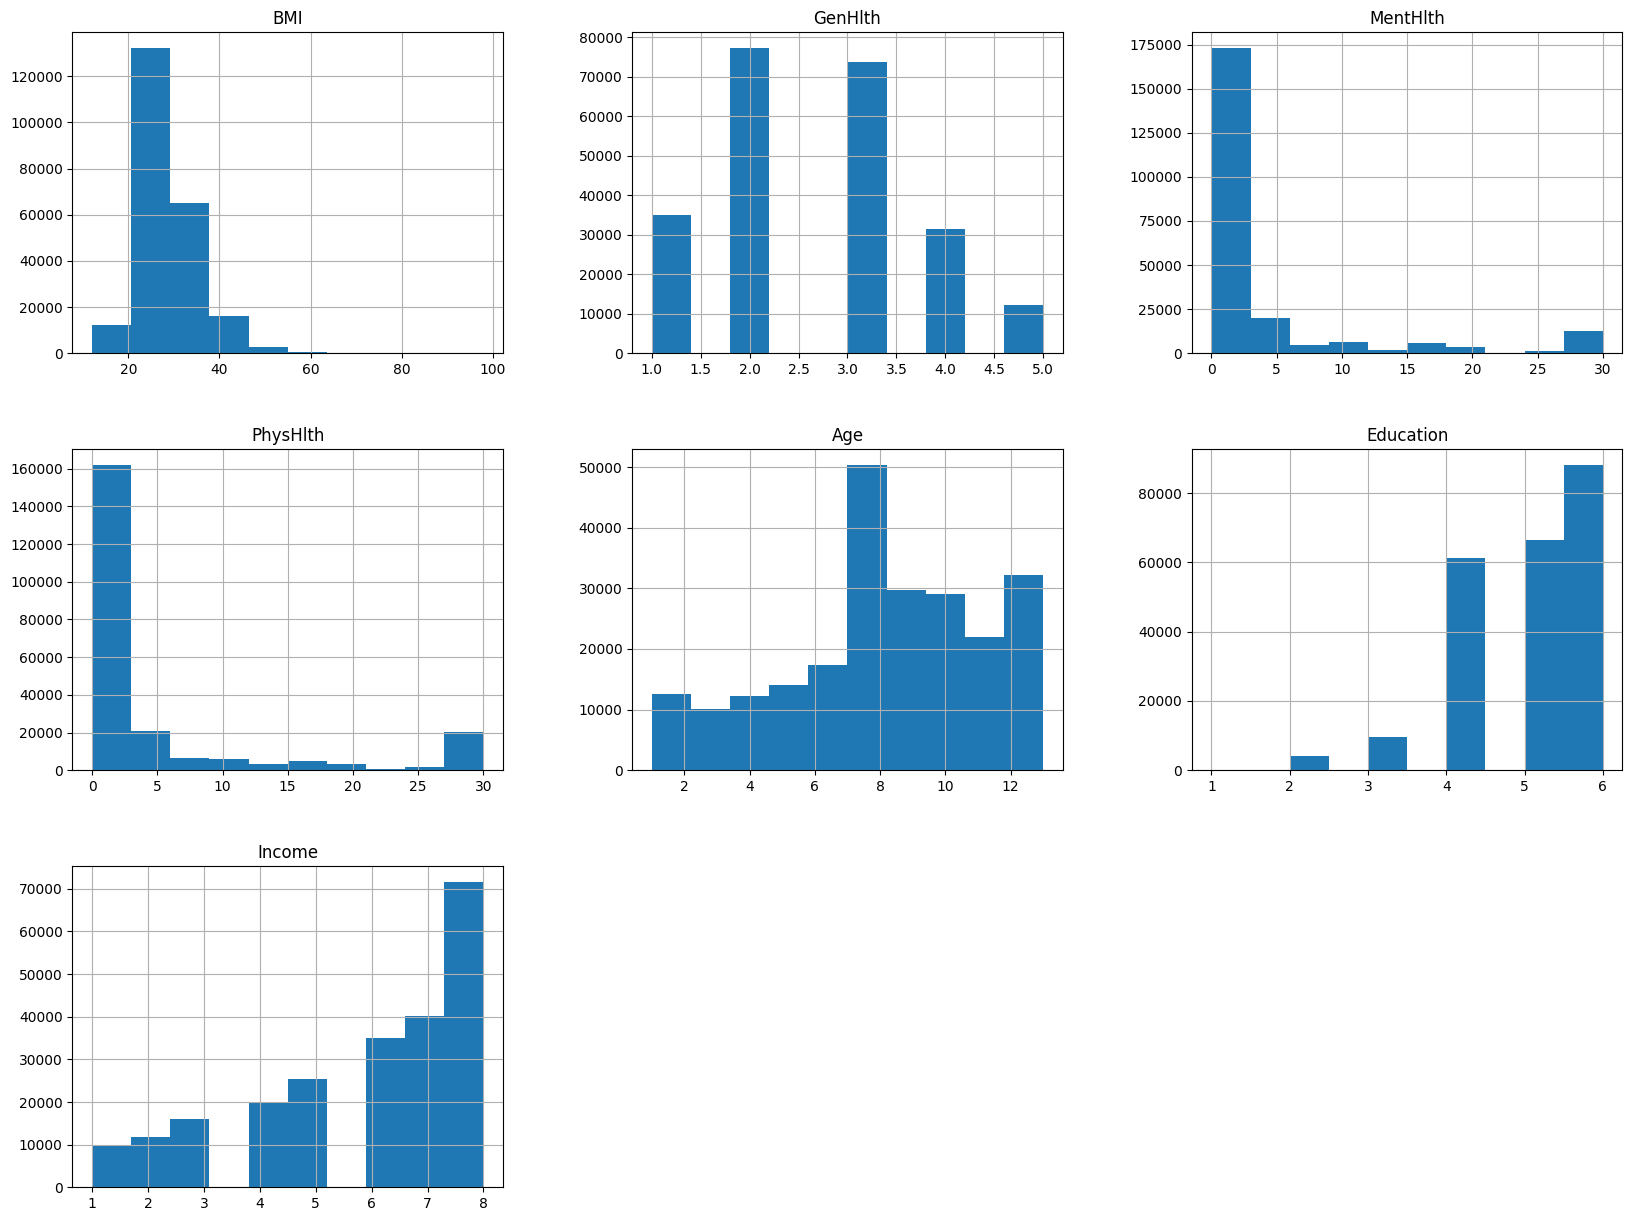

In [21]:
#Checking the distribution of non binary variables
df_non_binary.hist(figsize=(20,15));

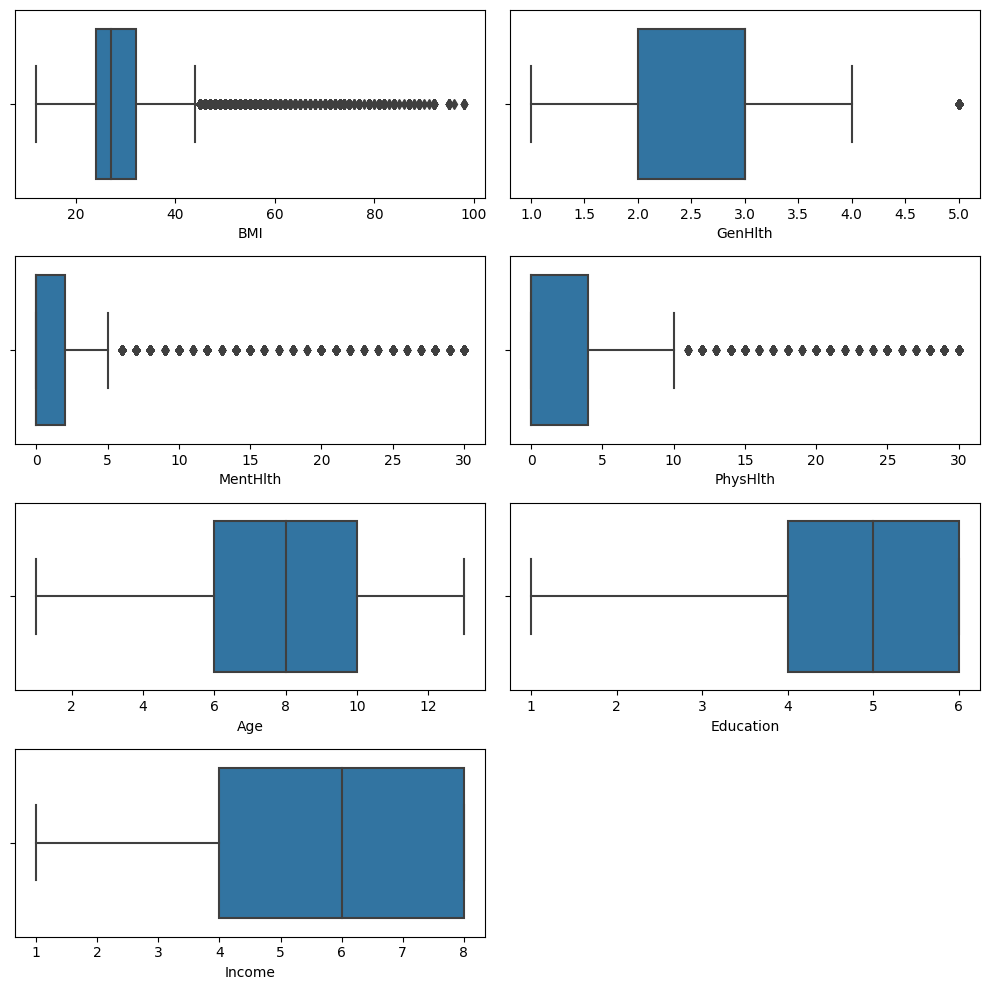

In [22]:
#Checking for the outliers in non binary features
plt.figure(figsize = (10,10))
for i,col in enumerate(df_non_binary):
  plt.subplot(4,2,i+1)
  sns.boxplot(x = col, data = df_non_binary)
plt.tight_layout()
plt.show()

## Exploring the Target variable

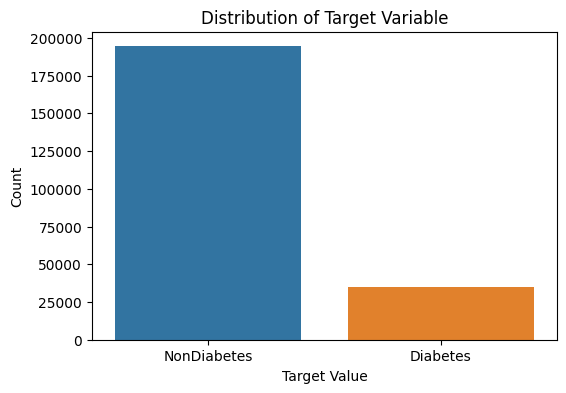

In [23]:
# Calculate percentage of target variable
target_count = df['Diabetes_binary'].value_counts()
total_count = target_count.sum()
percentages = target_count / total_count * 100

# Create a bar plot
plt.figure(figsize = (6,4), dpi = 100)
ax = sns.countplot(x='Diabetes_binary', data=df)

# Add labels to the plot
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
ax.set_xticklabels(['NonDiabetes', 'Diabetes'])

# Show the plot
plt.show()

Here we can se significant **imbalance** between two classes. It is crutial to ensure that ML model can accurately predict minority class.


### Relationship between features and the target variable

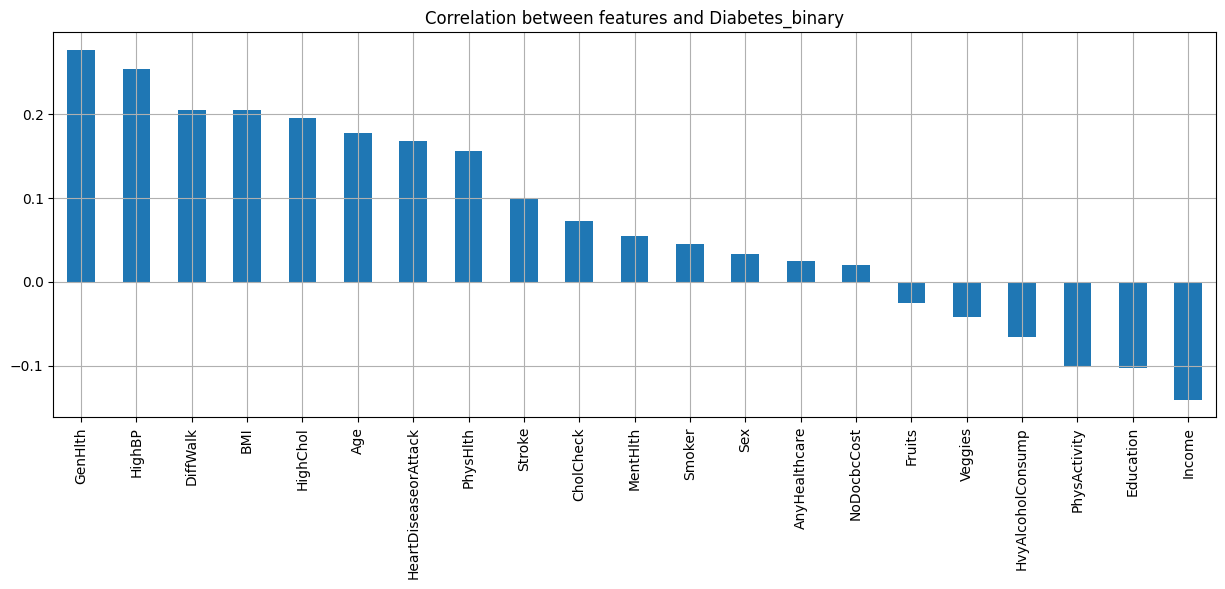

In [24]:
#Calculate correlation between feauteres and target variable
#Sort correlation values in decending order and create a bar plot
df.drop('Diabetes_binary', axis = 1).corrwith(df['Diabetes_binary']).sort_values(ascending= False).plot(kind= 'bar',
                                                                                                        figsize=(15,5),
                                                                                                        grid = True,
                                                                                                        title = 'Correlation between features and Diabetes_binary');

* 'GenHlth', 'HighBP','DiffWalk', 'BMI', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth' and 'Stoke' appear to have the strongest positive correlations - This suggests that as these indicators worsen or increase, so does the likelihood of diabetes.
* 'Income', 'Education', and 'PhysActivity' have the strongest negative correlations - A negative correlation means that higher values of these factors are associated with a lower likelihood of diabetes.
* 'Fruits', 'AnyHealthcare' , 'NoDocbccost' and 'Sex' are least correlated with Diabetes_binary.




### Relationship between demografic/socioeconomic factors and diabetes

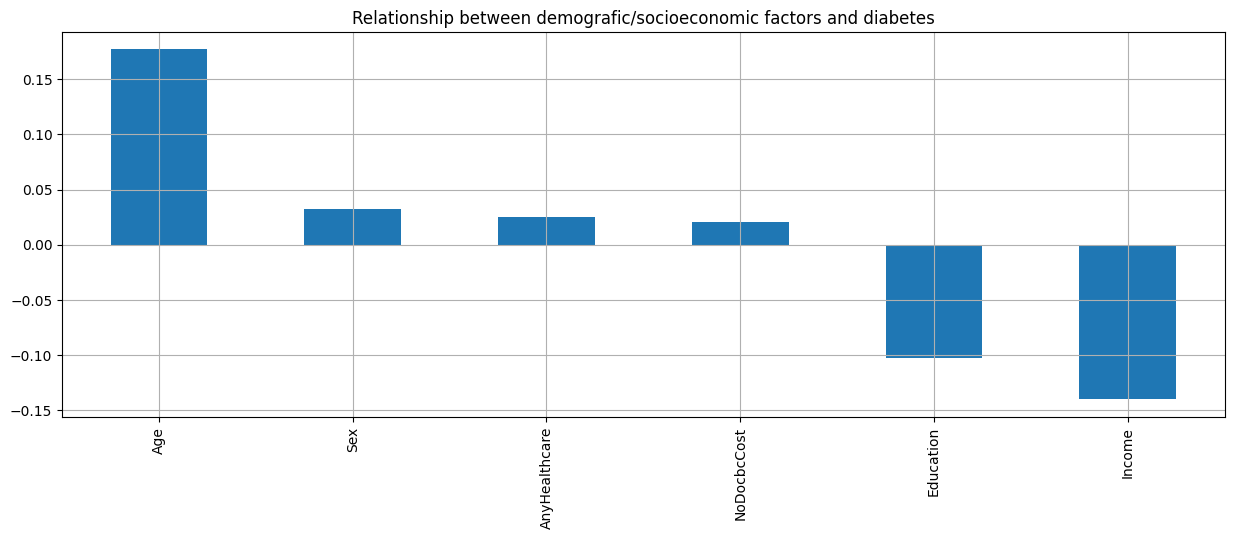

In [25]:
# Calculate the correlation between the demografic/socioeconomic features and the 'Diabetes_binary'.
# Sort the correlation values in descending order and create a bar plot.

df[['AnyHealthcare', 'NoDocbcCost', 'Sex', 'Age', 'Education', 'Income']].corrwith(df['Diabetes_binary']).sort_values(ascending= False).plot(kind = 'bar',
                                                                                                       figsize = (15, 5),
                                                                                                       grid = True,
                                                                                                       title = 'Relationship between demografic/socioeconomic factors and diabetes');

> There is a positive correlation between age and the diabetes outcome. This suggests that older individuals have a higher likelihood of having diabetes.
> The findings regarding education and income suggest that socioeconomic status is an important factor in diabetes prevalence.






### Relationship between health factors and diabetes

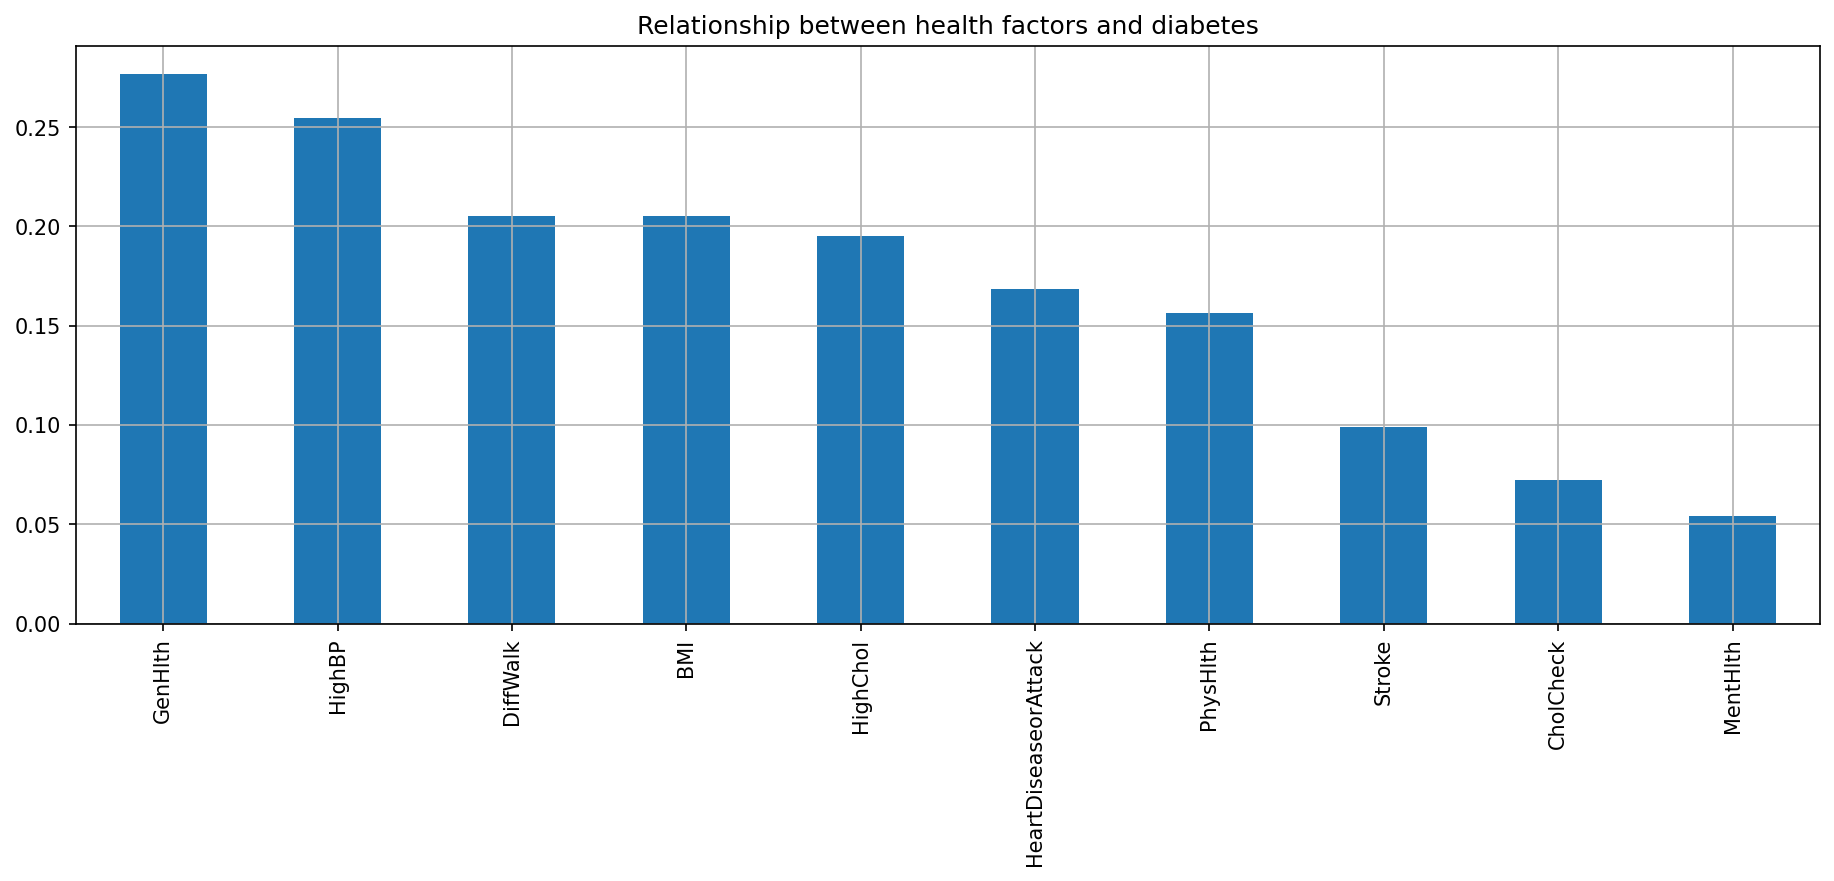

In [26]:
health_col = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk']
plt.figure(figsize = (15,8), dpi = 150)
df[health_col].corrwith(df['Diabetes_binary']).sort_values(ascending= False).plot(kind = 'bar',
                                                                                figsize = (15, 5),
                                                                                grid = True,
                                                                                title = 'Relationship between health factors and diabetes');

Focus on **High-Risk Groups**: Individuals with poor general health, high blood pressure, higher BMI, and high cholesterol, as these factors have stronger associations with diabetes.

### Relationship between habit factors and diabetes

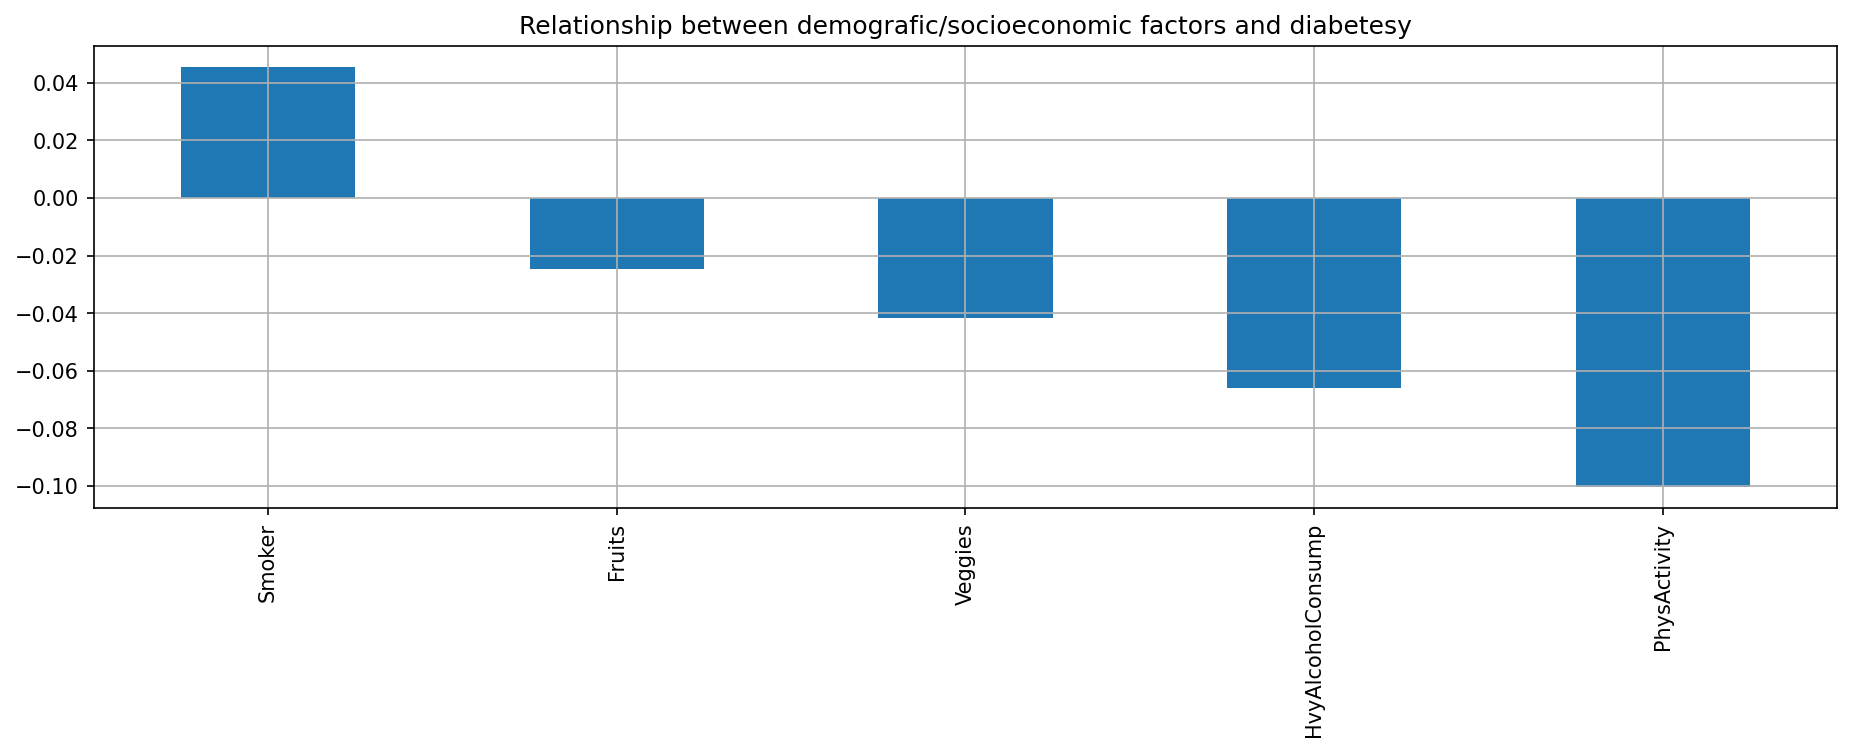

In [27]:
habit_col = ['Smoker','PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump']
plt.figure(figsize = (15,8), dpi = 150)
df[habit_col].corrwith(df['Diabetes_binary']).sort_values(ascending= False).plot(kind = 'bar',
                                                                                figsize = (15, 4),
                                                                                grid = True,
                                                                                title = 'Relationship between demografic/socioeconomic factors and diabetesy');

## Exploring Target Correlated Variables

In [28]:
#Plot the relationship between categorical variable and outcome
def categorical_plot (df, var, ticks):
  ax = sns.countplot(data = df, x = var, hue = 'Diabetes_binary', palette='Set1')
  ax.set_xticklabels(ticks)
  ax.grid(axis='y', linestyle='--', alpha=.5)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Diabetes_classification', labels = ['No-diabetes', 'Diabetics'])
  plt.title(f'Relationship between {var} and Diabetes_binary')
  plt.show;

#Plot the relatioship between numerical variable and outcome
def numerical_plot (df, var):
  ax = sns.countplot(data = df, x = var, hue = 'Diabetes_binary', palette='Set1')
  ax.grid(axis='y', linestyle='--', alpha=.5)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Diabetes_classification', labels = ['No-diabetes', 'Diabetics'])
  plt.title(f'Relationship between {var} and Diabetes_binary')
  plt.show;

binary_tick = ['No', 'Yes']

### 'GenHlth' relation with 'Diabetes_binary'


> Information About Selected Variable

Would you say that in general your health is:
1. Excellent
2. Very good
3. Good
4. Fair
5. Poor



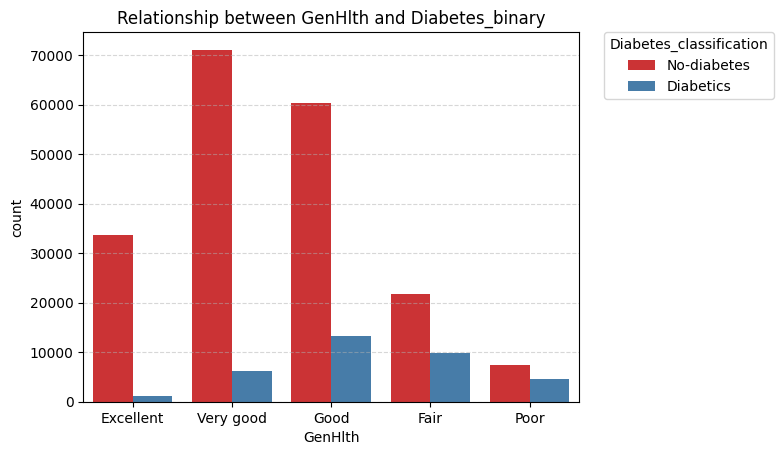

In [29]:
genhlt_groups = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
categorical_plot(df,'GenHlth', genhlt_groups);

> As self-perception of general health declines, the number of individuals with diabetes increases. Also there is higher prevalence of diabetes in individuals who rate their health as 'Poor'.






### 'HighBP' relation with 'Diabetes_binary'


> Information About Selected Variable

Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional




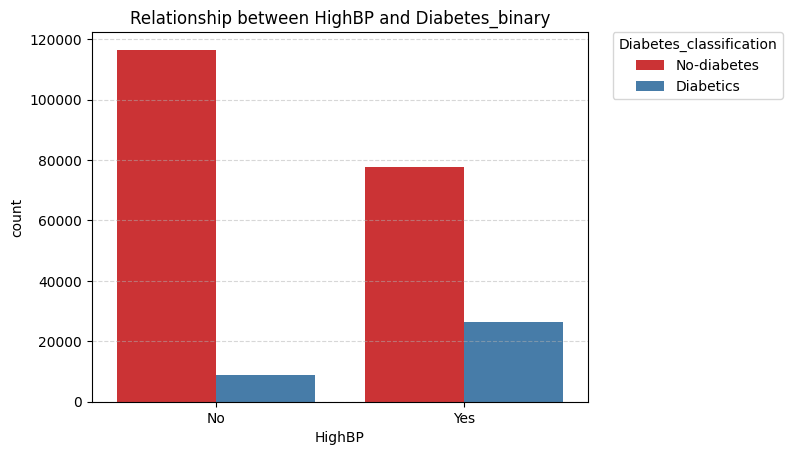

In [30]:
categorical_plot(df, 'HighBP', binary_tick);



> A large majority of individuals without high blood preaure don't have Diabetes. But there is significant number o diabetics among those who have high blood preasure (higher prevalence of diabetes).



###  

### 'DiffWalk' relation with 'Diabetes_binary'


> Information About Selected Variable

Do you have serious difficulty walking or climbing stairs?



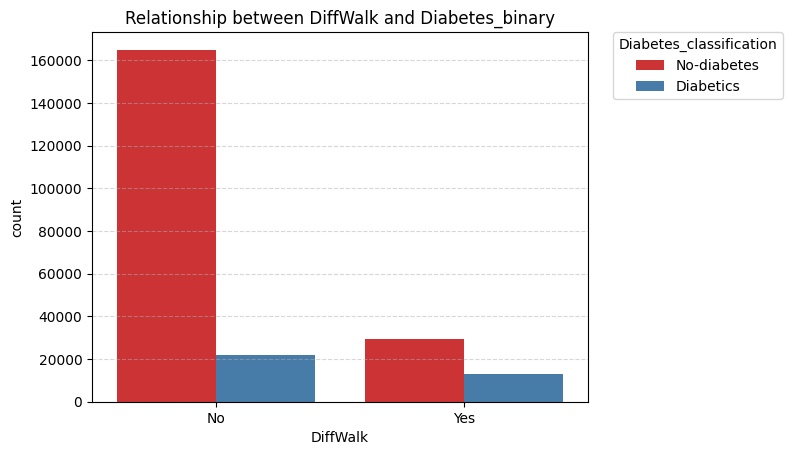

In [31]:
categorical_plot(df, 'DiffWalk', binary_tick);



> There is noticable number of people with diabetes who have difficulty walking (higher prevalence). Majority of non-diabetic people do not report difficulty walking.



### 'BMI' relation with 'Diabetes_binary'


> Information About Selected Variable

Body Mass Index (BMI) is a measure of body fat based on a person's weight and height. It is calculated by dividing a person's weight in kilograms by the square of their height in meters (kg/m²).
According with CDC:

For adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.

* If your BMI is less than 18.5, it falls within the **Underweight** range.
* If your BMI is 18.5 to 24.9, it falls within the **Normal Weight** range.
* If your BMI is 25.0 to 29.9, it falls within the **Overweight** range.
* If your BMI is 30.0 or higher, it falls within the **Obese** range.

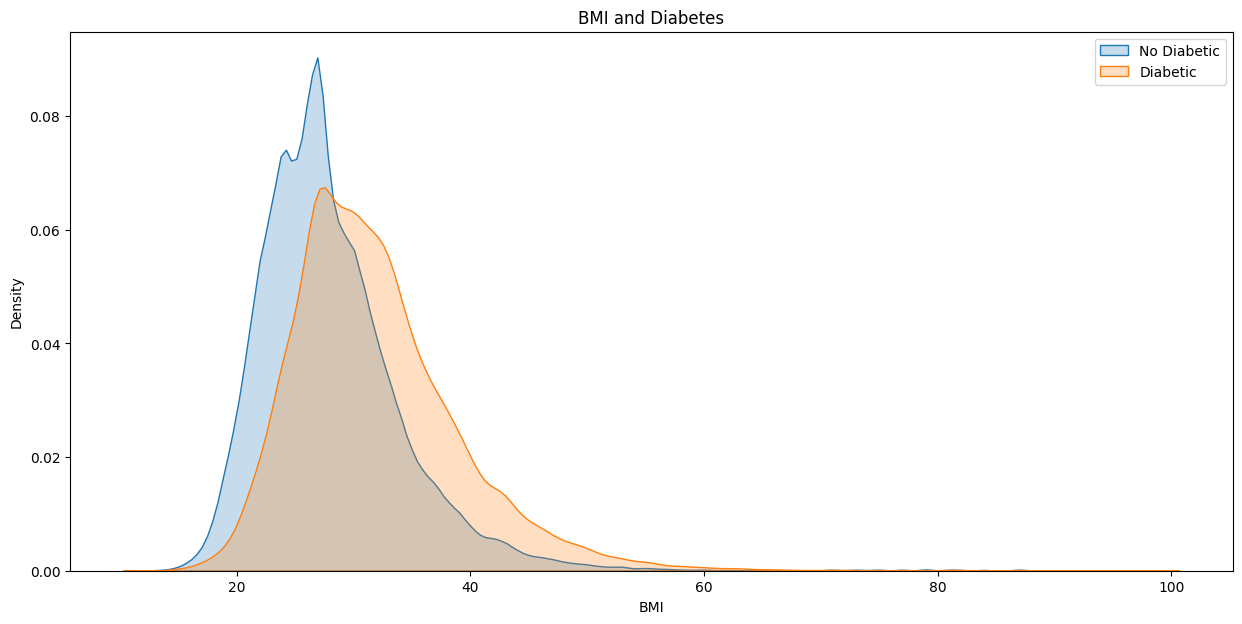

In [32]:
#Checking BMI distribution
plt.figure(figsize=(15, 7))

sns.kdeplot(data = df, x = df.BMI[df.Diabetes_binary == 0], label="No Diabetic", fill=True)
sns.kdeplot(data = df, x = df.BMI[df.Diabetes_binary == 1], label="Diabetic", fill=True)
plt.title("BMI and Diabetes")
plt.legend();

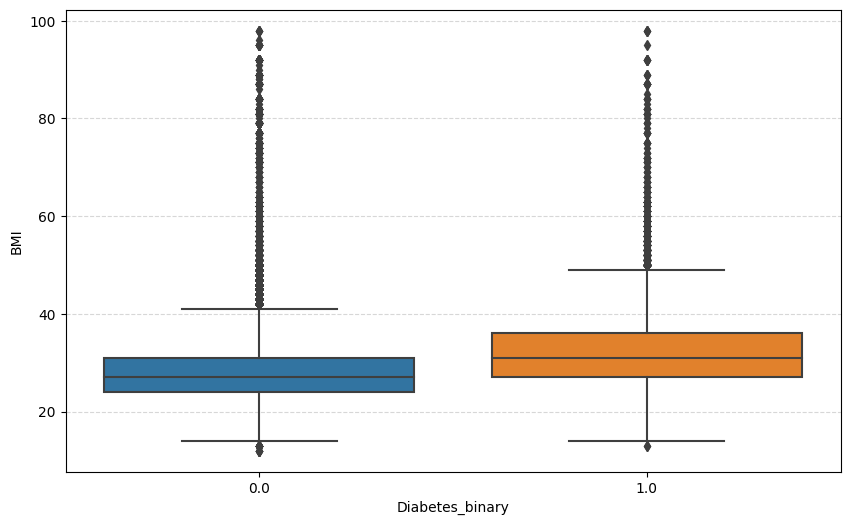

In [33]:
#BMI boxplot
plt.figure(figsize = (10,6), dpi = 100)
ax = sns.boxplot(data = df, x = 'Diabetes_binary', y = 'BMI')
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.show();

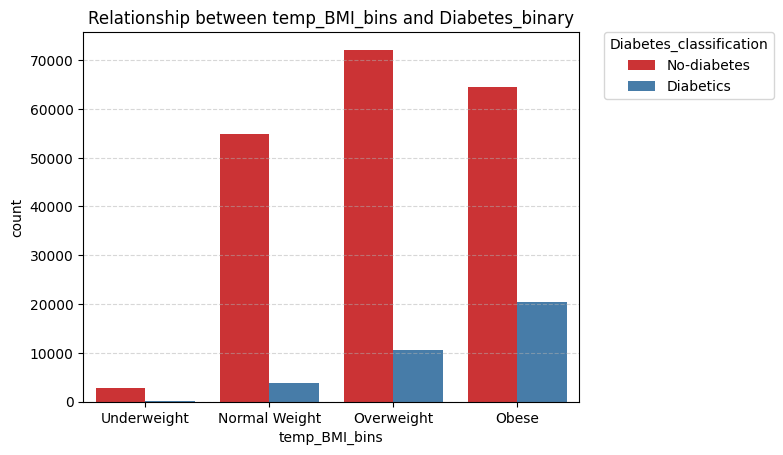

In [34]:
#Defining bins and labels for BMI categories
BMI_bins = [0, 18.5, 24.9, 29.9, float('inf')]
BMI_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

#Create temporary BMI_bins column for ploting
df['temp_BMI_bins'] = pd.cut(df['BMI'], bins = BMI_bins, labels = BMI_labels, include_lowest=True)

#Plotting BMI_bins
categorical_plot(df, 'temp_BMI_bins', BMI_labels);

In [35]:
#Drop temp_BMI_bins column
df = df.drop('temp_BMI_bins', axis = 1)



> There is a clear trend that as BMI category increases, the count of diabetic individuals also increases.  The 'Obese' category has the highest count of diabetics compared to other categories.



### 'HighChol' relation with 'Diabetes_binary'


> Information About Selected Variable

Have you ever been told by a doctor, nurse or other health professional that your blood cholesterol is high?



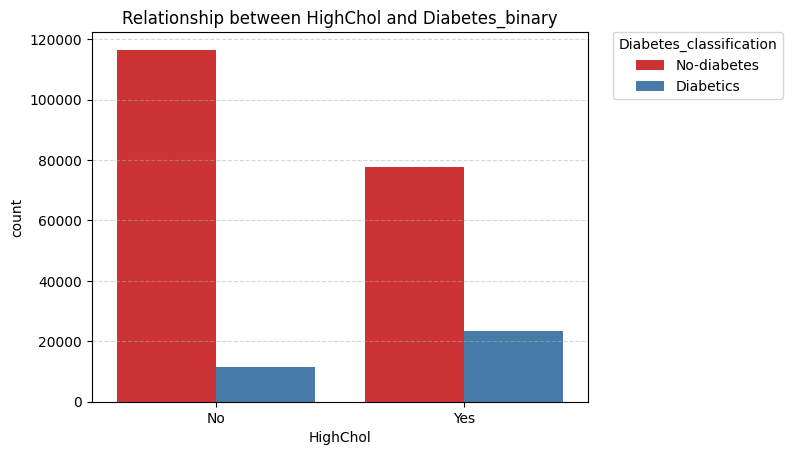

In [36]:
categorical_plot(df, 'HighChol', binary_tick)



> The majority of individuals without high cholesterol do not have diabetes. This suggests that among the population without high cholesterol, diabetes is less prevalent. Among patients with high cholesterol, there is a significant count of individuals with diabetes.


### 'Age' relation with 'Diabetes_binary'


> Information About Selected Variable

Patient age classification:
1. 18-24 years old
2. 25-29 years old
3. 30-34 years old
4. 35-39 years old
5. 40-44 years old
6. 45-49 years old
7. 50-54 years old
8. 55-59 years old
9. 60-64 years old
10. 65-69 years old
11. 70-74 years old
12. 75-79 years old
13. 80 years and older






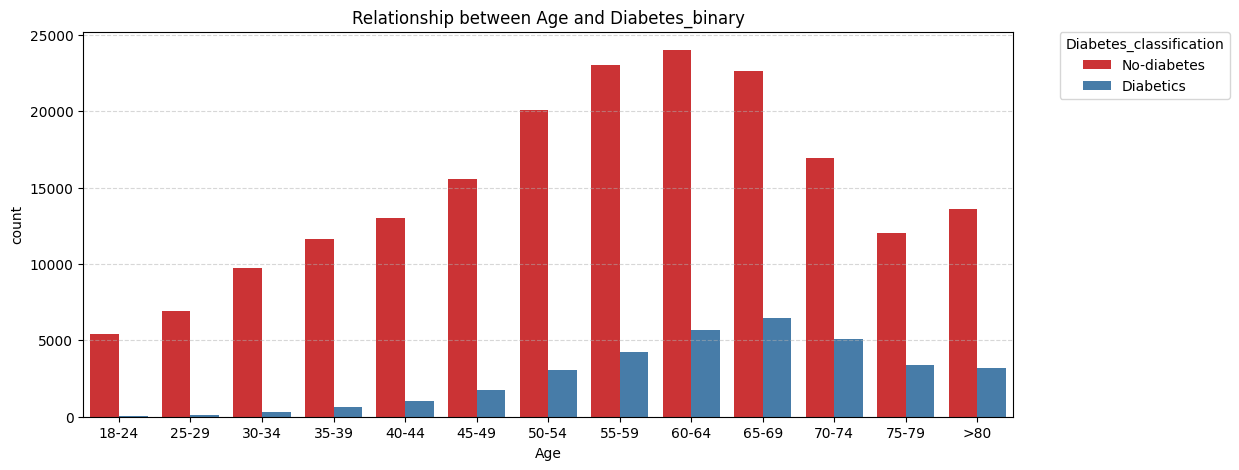

In [37]:
plt.figure(figsize=(12,5))
age_ticks = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','>80' ]
categorical_plot(df, 'Age', age_ticks)



> The number of individuals with diabetes generally increases with age. This trend is especially noticeable in the age groups from 50-54 years, indicating a higher prevalence of diabetes in older age groups.



### 'HeartDiseaseorAttack' relation with 'Diabetes_binary'


> Information About Selected Variable

Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)



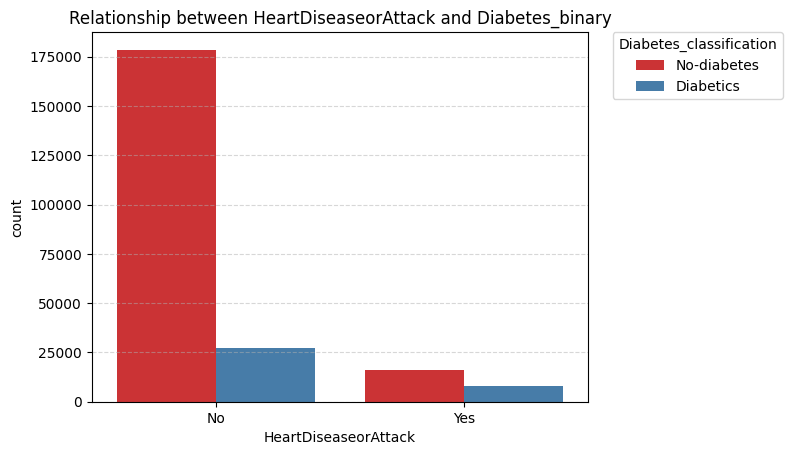

In [38]:
categorical_plot(df, 'HeartDiseaseorAttack', binary_tick)



> The presence of heart disease or heart attack is more common among diabetics than non-diabetics, highlighting the importance of cardiovascular health management in diabetes.



### 'PhysHlth' relation with 'Diabetes_binary'


> Information About Selected Variable

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?



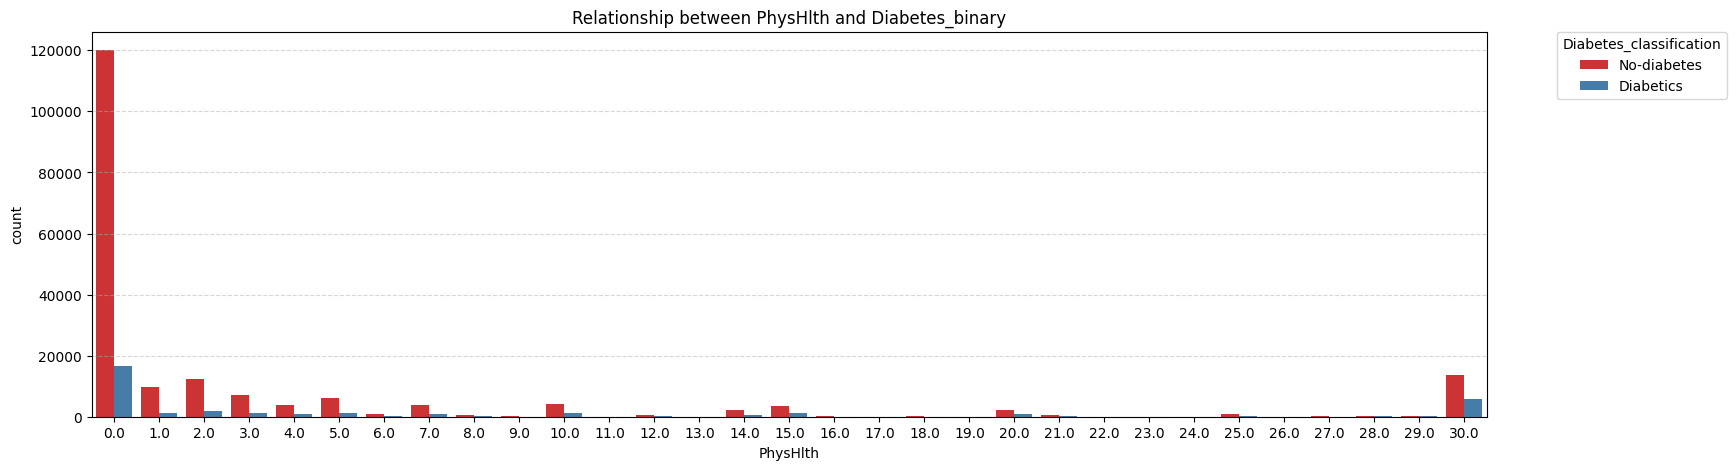

In [39]:
plt.figure(figsize=(18,5))
numerical_plot(df, 'PhysHlth')



> The majority of individuals, both diabetics and non-diabetics, reported zero days of poor physical health. As the reported number of days with poor physical health increases, the count of diabetics also increases. This suggests that diabetics are more likely to report poor physical health over a greater number of days.



### 'Income' relation with 'Diabetes_binary'

> Information About Selected Variable

Annual household income from all sources:
1. <10,000
2. 10,000–15,000
3. 15,000–20,000
4. 20,000–25,000
5. 25,000–35,000
6. 35,000–50,000
7. 50,000-75,000
8..>75,000




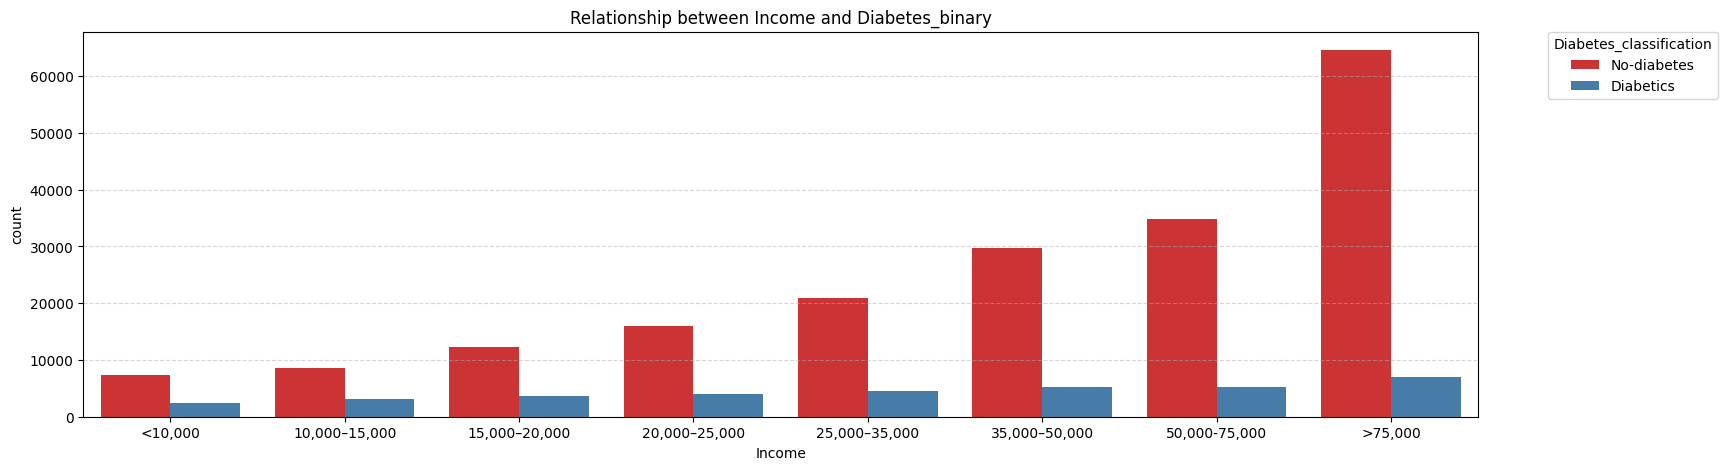

In [40]:
plt.figure(figsize=(18,5))
income_ticks = ['<10,000','10,000–15,000','15,000–20,000','20,000–25,000','25,000–35,000','35,000–50,000','50,000-75,000','>75,000']
categorical_plot(df, 'Income', income_ticks)



> There is a trend where lower income brackets have a higher prevalence of diabetes. The groups with income less than $35,000 show a greater number of diabetics compared to the higher income brackets. As income increases, the prevalence of diabetes decreases.
Socio-economic status, represented by income level, plays a significant role in the prevalence of diabetes, and that improving economic conditions may contribute to better health outcomes.



### 'Education' relation with 'Diabetes_binary'


> Information About Selected Variable

What is the highest grade or year of school you completed?

1. Never attended school or only kindergarten
2. Grades 1 through 8 (Elementary)
3. Grades 9 through 11 (Some high school)
4. Grade 12 or GED (High school graduate)
5. College 1 year to 3 years (Some college or technical school)
6. College 4 years or more (College graduate)



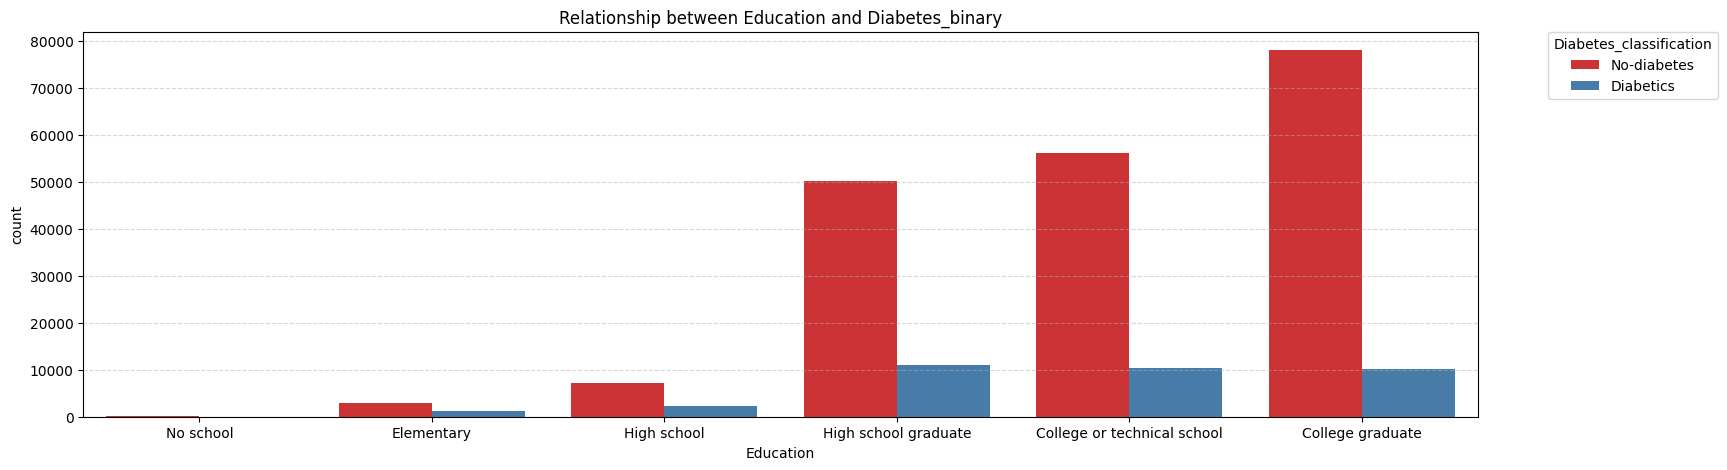

In [41]:
plt.figure(figsize=(18,5))
education_ticks = ['No school', 'Elementary', 'High school', 'High school graduate', 'College or technical school', 'College graduate']
categorical_plot(df, 'Education', education_ticks)



> The 'High school graduate' category shows a significant contrast between the number of non-diabetics and diabetics, with a notably higher proportion of non-diabetics.



### 'PhysActivity' relation with 'Diabetes_binary'


> Information About Selected Variable

Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.



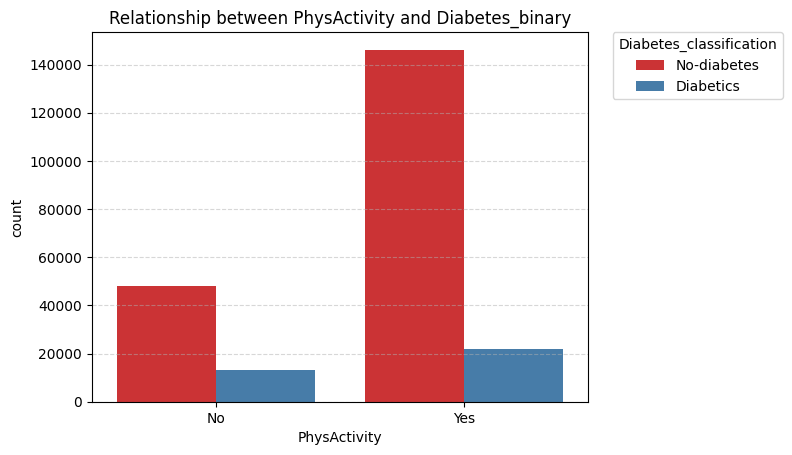

In [42]:
categorical_plot(df, 'PhysActivity', binary_tick)



> The chart shows a larger count of non-diabetic individuals who engage in physical activity compared to those who do not. This suggests that physical activity might be associated with a lower prevalence of diabetes.



## Correlation between variables

In [43]:
#Check for correlation between variable
df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,-0.008519,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907


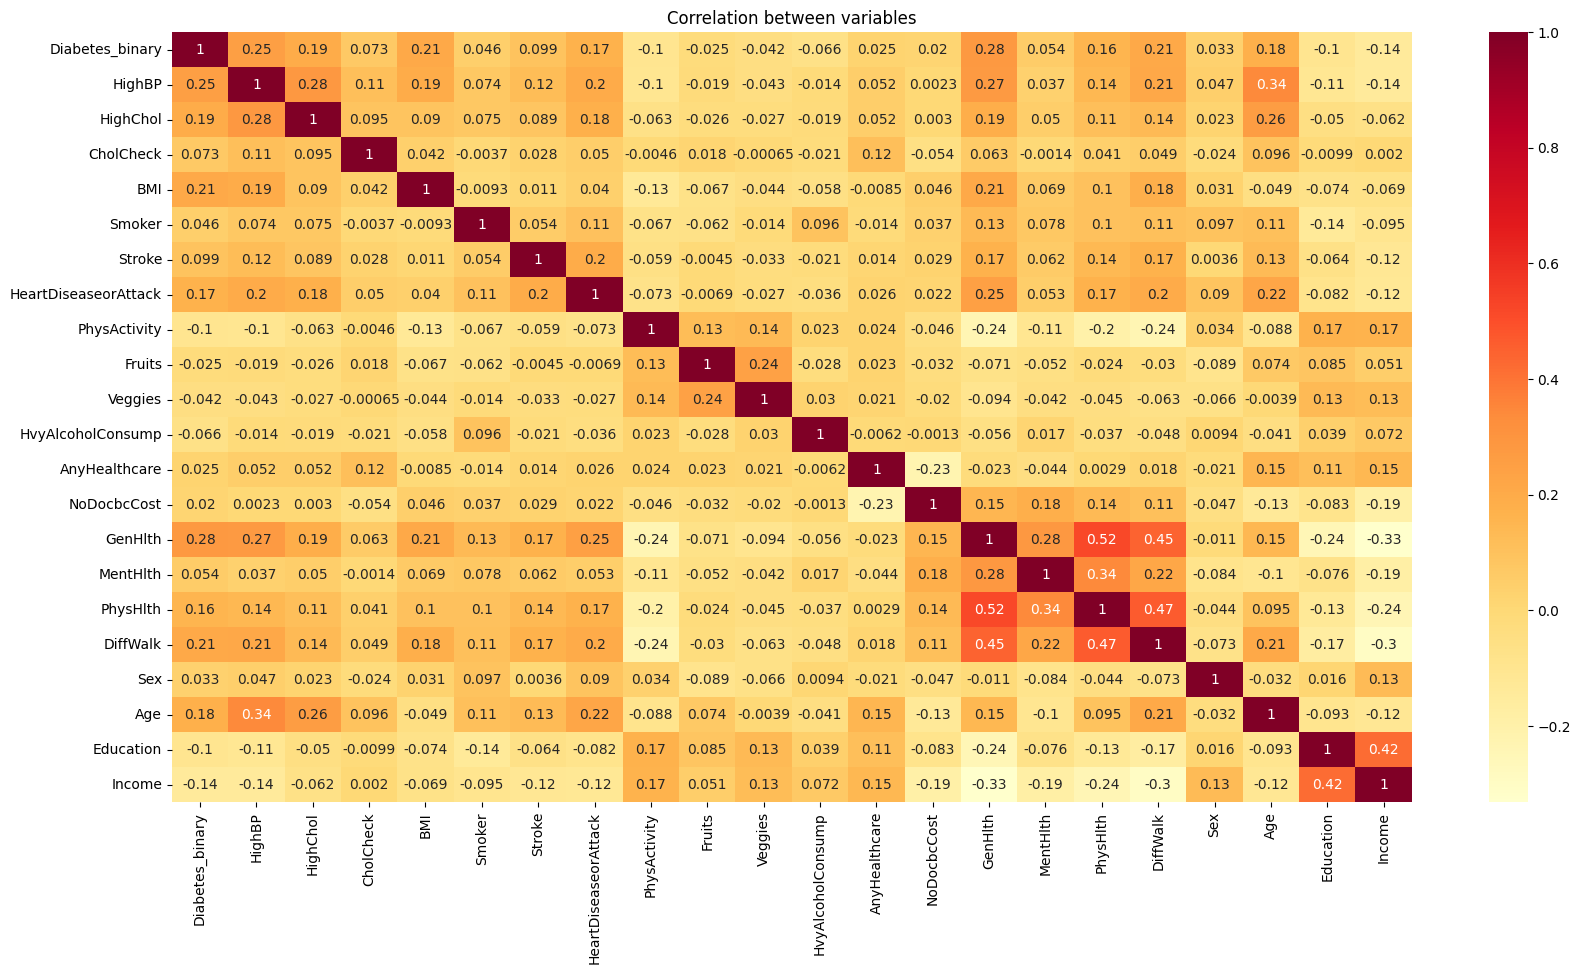

In [44]:
#Visualising correlation matrix with heatmap for better interpretation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation between variables');

Strong Correlations

Variables **Physical Health** and **General Health** correlated positively (as one variable increases, the other variable tends to increase as well).
In this case, it suggests that individuals who have better physical health are also more likely to have better general health.

Variables **Income** and General Health correlated negatively (as one variable increases, the other variable tends to decrease).
In this case, it suggests that individuals with lower income are more likely to have poorer general health.

## Mashine learning

In [58]:
#Importing libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, roc_auc_score

#Split data into X and y
X=df.drop("Diabetes_binary",axis=1)
y=df["Diabetes_binary"]

#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define the models
logreg_model = LogisticRegression(max_iter = 1500, random_state=42)
rf_model = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

In [47]:
#Define a function to fit and evaluate the models
def fit_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    #Fit the model on the training data
    model.fit(X_train, y_train)

    #Make predictions on the train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate the performance of the model using various metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
    test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)

    #Create a dictionary of the evaluation metrics
    metrics = {
        "Accuracy": [train_accuracy, test_accuracy],
        "Balanced accuracy": [train_balanced_accuracy, test_balanced_accuracy],
        "F1 score": [train_f1, test_f1],
        "Recall": [train_recall, test_recall],
        "ROC AUC score": [train_roc_auc, test_roc_auc]
    }

    #Create a DataFrame from the metrics dictionary
    df = pd.DataFrame(metrics, index=["Train", "Test"])

    return df

### ML without balancing the data

In [48]:
#Call the function for each model and print the resulting DataFrames
logreg_df = fit_and_evaluate_model(logreg_model, X_train, X_test, y_train, y_test)
rf_df = fit_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test)

In [49]:
logreg_df

,Accuracy,Balanced accuracy,F1 score,Recall,ROC AUC score
Train,0.850773,0.563292,0.234199,0.149527,0.563292
Test,0.849069,0.562775,0.233145,0.148687,0.562775


In [50]:
rf_df

,Accuracy,Balanced accuracy,F1 score,Recall,ROC AUC score
Train,0.863661,0.577116,0.269376,0.164697,0.577116
Test,0.850005,0.550458,0.194288,0.117199,0.550458


### ML models with SMOTE tehnique

In [52]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [54]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE algorithm
smote = SMOTE(random_state=42)

# Resample the minority class in the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after resampling in the training set
print("Class distribution before resampling in the training set:", sum(y_train == 0), "samples in class 0 and", sum(y_train == 1), "samples in class 1")
print("Class distribution after resampling in the training set:", sum(y_train_resampled == 0), "samples in class 0 and", sum(y_train_resampled == 1), "samples in class 1")

Class distribution before resampling in the training set: 155564 samples in class 0 and 28015 samples in class 1
Class distribution after resampling in the training set: 155564 samples in class 0 and 155564 samples in class 1


In [55]:
#Call the function for each model and print the resulting DataFrames
logreg_smote_df = fit_and_evaluate_model(logreg_model, X_train_resampled, X_test, y_train_resampled, y_test)
rf_smote_df = fit_and_evaluate_model(rf_model, X_train_resampled, X_test, y_train_resampled, y_test)

In [56]:
logreg_smote_df

,Accuracy,Balanced accuracy,F1 score,Recall,ROC AUC score
Train,0.741923,0.741923,0.749337,0.771502,0.741923
Test,0.718858,0.729885,0.450164,0.745835,0.729885


In [57]:
rf_smote_df

,Accuracy,Balanced accuracy,F1 score,Recall,ROC AUC score
Train,0.876151,0.876151,0.875437,0.870420,0.876151
Test,0.814925,0.669282,0.433356,0.458628,0.669282
